In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/combined%20Dataset.csv"
df = pd.read_csv(url)



In [2]:
# Display the first few rows of the dataset to understand its structure
print(df.head())




   etpSrcIP   etpSrcP   etpDstP  etpProtocol  totalPacket  label
0  2.536088  0.068600  0.046527     0.055703         1724      0
1  2.437283  0.403030  0.178079     0.231339         1674      0
2  2.631475  0.000000  0.000000     0.000000         1423      0
3  2.930899  0.744501  0.761118     0.507351         1867      0
4  4.449604  0.735550  3.596202     0.999931         2973      0


In [3]:
# Check the data types and basic statistics of the numerical columns
print(df.info())
print(df.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   etpSrcIP     718 non-null    float64
 1   etpSrcP      718 non-null    float64
 2   etpDstP      718 non-null    float64
 3   etpProtocol  718 non-null    float64
 4   totalPacket  718 non-null    int64  
 5   label        718 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 33.8 KB
None
         etpSrcIP     etpSrcP     etpDstP  etpProtocol    totalPacket  \
count  718.000000  718.000000  718.000000   718.000000     718.000000   
mean     8.263882    0.924619    0.700327     0.328038  455704.774373   
std      4.671150    0.544394    0.727217     0.187771  391359.488987   
min      2.292760    0.000000    0.000000     0.000000    1223.000000   
25%      2.597673    0.365440    0.172157     0.216382    1863.000000   
50%     12.016391    1.275059    0.767632     0.365121  708984.500

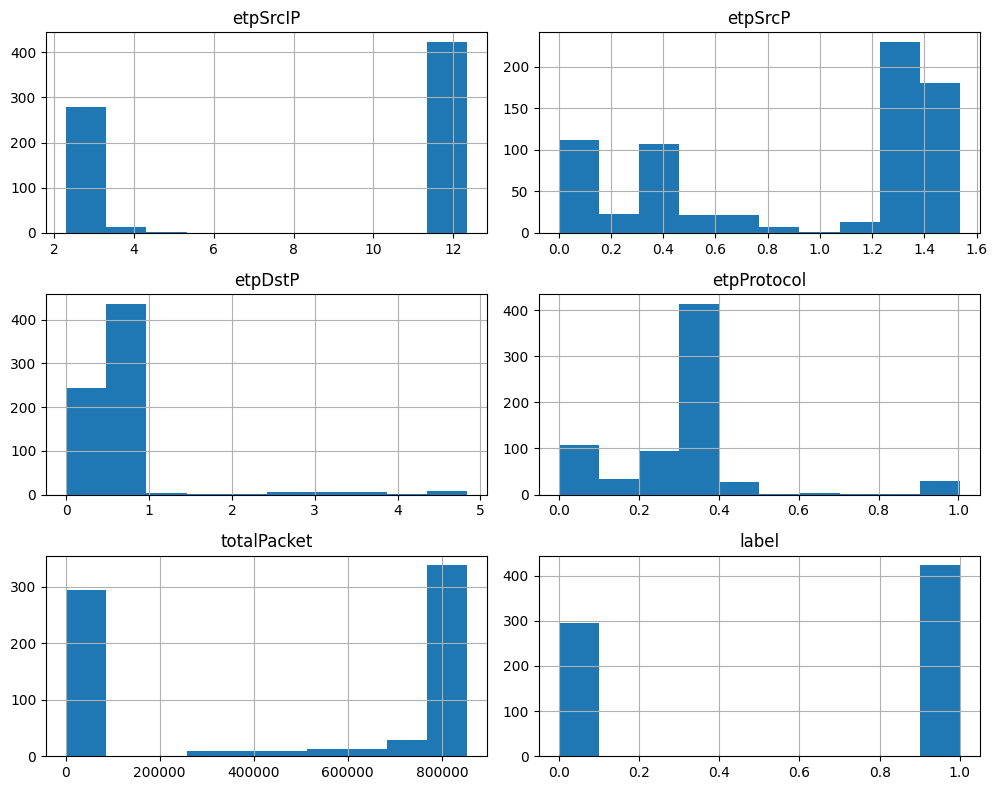

In [4]:
# Data Visualization
# Plotting histograms for numerical features
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()



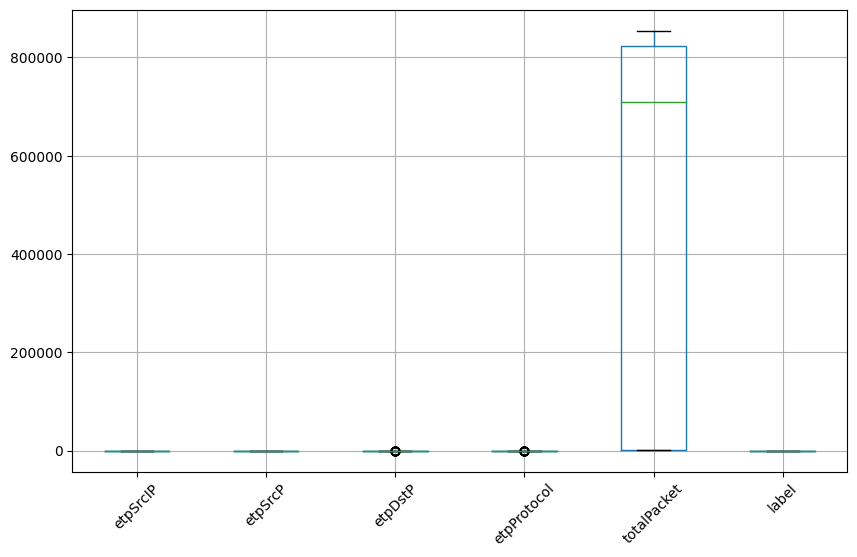

In [5]:
# Boxplot for numerical features
df.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)
plt.show()

# You can also create other types of plots like scatter plots, bar plots, etc. based on your analysis needs

In [6]:
import numpy as np

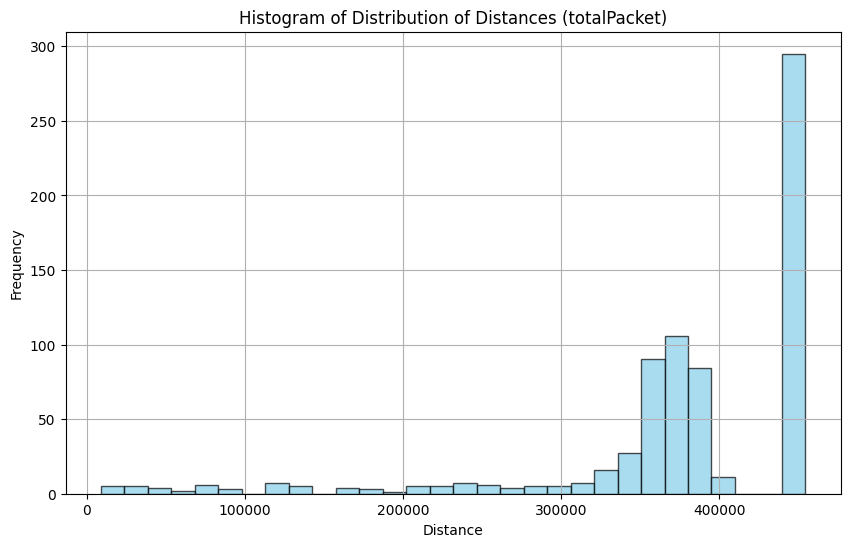

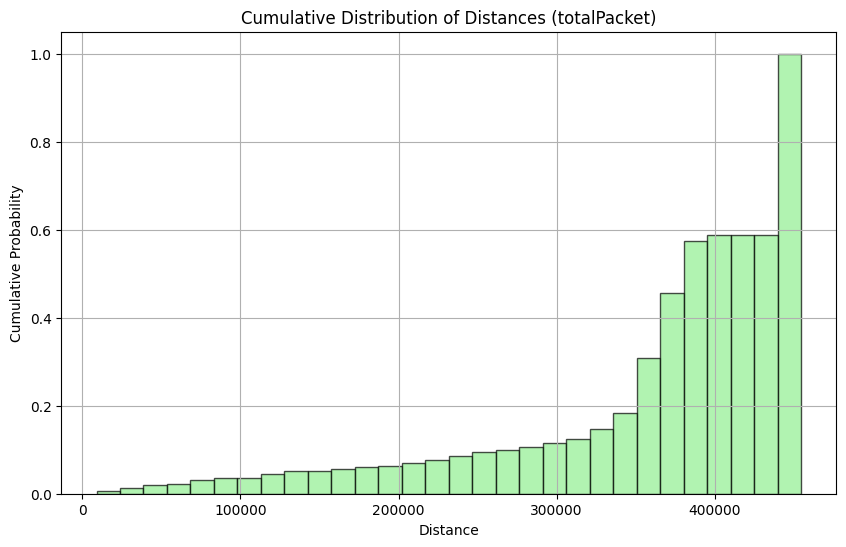

In [7]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # Load the dataset
# url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/combined%20Dataset.csv"
# df = pd.read_csv(url)

# Selecting the feature for distance calculation
feature = 'totalPacket'

# Calculate distances
distances = np.abs(df[feature] - df[feature].mean())

# Plotting histogram of the distribution of distances
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Distribution of Distances (' + feature + ')')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting cumulative distribution of distances
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=30, color='lightgreen', edgecolor='black', alpha=0.7, cumulative=True, density=True)
plt.title('Cumulative Distribution of Distances (' + feature + ')')
plt.xlabel('Distance')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()


In [8]:
import pandas as pd
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/sudomaster00081/MscProj/main/Implimentation/combined%20Dataset.csv"
df = pd.read_csv(url)

# Drop the 'label' column for now
df.drop('label', axis=1, inplace=True)

# Calculate and store the mean and standard deviation for each dimension
mean_std_dict = {}
for col in df.columns:
    mean_std_dict[col] = (df[col].mean(), df[col].std())

# Define the function for normalization using tanh-estimator method
def normalize_with_tanh_estimator(data, mean_std_dict):
    normalized_data = pd.DataFrame()
    for col in data.columns:
        mu, sigma = mean_std_dict[col]
        normalized_col = 0.5 * (np.tanh(0.1 * ((data[col] - mu) / sigma)) + 1)
        normalized_data[col] = normalized_col
    return normalized_data

# Normalize the dataset using tanh-estimator method
normalized_df = normalize_with_tanh_estimator(df, mean_std_dict)

# Display the first few rows of the normalized dataset
print(normalized_df.head())

# Store mean_std_dict for later use in real-time operation
# You can save it to a file or store it in memory, depending on your requirements


   etpSrcIP   etpSrcP   etpDstP  etpProtocol  totalPacket
0  0.438995  0.422020  0.455169     0.427986     0.442258
1  0.437954  0.452241  0.464154     0.474274     0.442252
2  0.440001  0.415885  0.451997     0.413527     0.442220
3  0.443162  0.483463  0.504180     0.547603     0.442276
4  0.459262  0.482642  0.689210     0.671649     0.442416


In [9]:
mean_std_dict

{'etpSrcIP': (8.263881658687838, 4.671149926162893),
 'etpSrcP': (0.9246188369475715, 0.5443941383426818),
 'etpDstP': (0.7003273029028211, 0.7272171514281917),
 'etpProtocol': (0.3280379809243417, 0.18777105312169787),
 'totalPacket': (455704.77437325905, 391359.48898741446)}

In [10]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=e3fef970e727cb911180b4594286e0596a006e3a9fd33e9f159a3264afcab0bd
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [16]:
import numpy as np

class SOM:
    def __init__(self, input_size, grid_size):
        self.input_size = input_size
        self.grid_size = grid_size
        self.weights = np.random.rand(grid_size[0], grid_size[1], input_size)

    def euclidean_distance(self, x, y):
        return np.sqrt(np.sum((x - y) ** 2))

    def find_bmu(self, x):
        min_dist = float('inf')
        bmu = None
        for i in range(self.grid_size[0]):
            for j in range(self.grid_size[1]):
                dist = self.euclidean_distance(x, self.weights[i, j])
                if dist < min_dist:
                    min_dist = dist
                    bmu = (i, j)
        return bmu

    def update_weights(self, x, bmu, learning_rate, radius):
        for i in range(self.grid_size[0]):
            for j in range(self.grid_size[1]):
                dist_to_bmu = self.euclidean_distance(np.array(bmu), np.array((i, j)))
                if dist_to_bmu <= radius:
                    self.weights[i, j] += learning_rate * np.exp(-dist_to_bmu / (2 * (radius ** 2))) * (x - self.weights[i, j])

    def train(self, data, epochs, initial_learning_rate, initial_radius):
        for epoch in range(epochs):
            for sample in data:
                bmu = self.find_bmu(sample)
                self.update_weights(sample, bmu, initial_learning_rate * np.exp(-epoch / epochs),
                                    initial_radius * np.exp(-epoch / epochs))
            print(f"Epoch {epoch+1}/{epochs} completed.")

# Example usage:
# Initialize SOM
input_size = 5  # Dimension of input vectors
grid_size = (30, 30)  # Size of SOM grid
som = SOM(input_size, grid_size)

# Load the normalized dataset into 'normalized_df'

# Convert the dataframe into numpy array for training
data = normalized_df.values

# Define training parameters
epochs = 100  # Number of training epochs
initial_learning_rate = 0.1  # Initial learning rate
initial_radius = max(grid_size) / 2  # Initial radius for neighborhood function

# Train the SOM
som.train(data, epochs, initial_learning_rate, initial_radius)


Epoch 1/100 completed.
Epoch 2/100 completed.
Epoch 3/100 completed.
Epoch 4/100 completed.
Epoch 5/100 completed.
Epoch 6/100 completed.
Epoch 7/100 completed.
Epoch 8/100 completed.
Epoch 9/100 completed.
Epoch 10/100 completed.
Epoch 11/100 completed.
Epoch 12/100 completed.
Epoch 13/100 completed.
Epoch 14/100 completed.
Epoch 15/100 completed.
Epoch 16/100 completed.
Epoch 17/100 completed.
Epoch 18/100 completed.
Epoch 19/100 completed.
Epoch 20/100 completed.
Epoch 21/100 completed.
Epoch 22/100 completed.
Epoch 23/100 completed.
Epoch 24/100 completed.
Epoch 25/100 completed.
Epoch 26/100 completed.
Epoch 27/100 completed.
Epoch 28/100 completed.
Epoch 29/100 completed.
Epoch 30/100 completed.
Epoch 31/100 completed.
Epoch 32/100 completed.
Epoch 33/100 completed.
Epoch 34/100 completed.
Epoch 35/100 completed.
Epoch 36/100 completed.
Epoch 37/100 completed.
Epoch 38/100 completed.
Epoch 39/100 completed.
Epoch 40/100 completed.
Epoch 41/100 completed.
Epoch 42/100 completed.
E

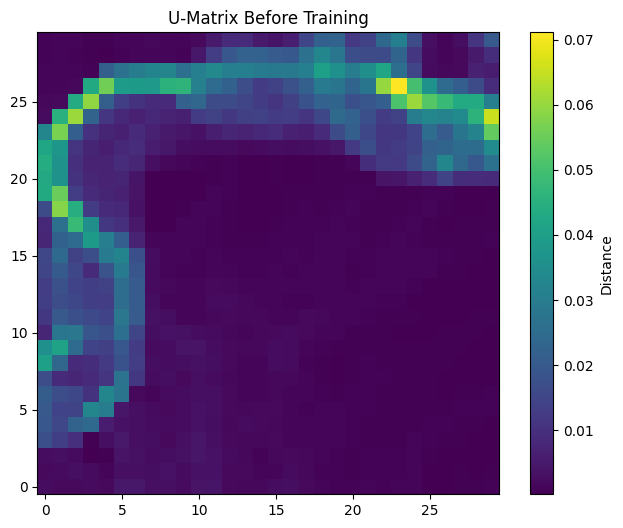

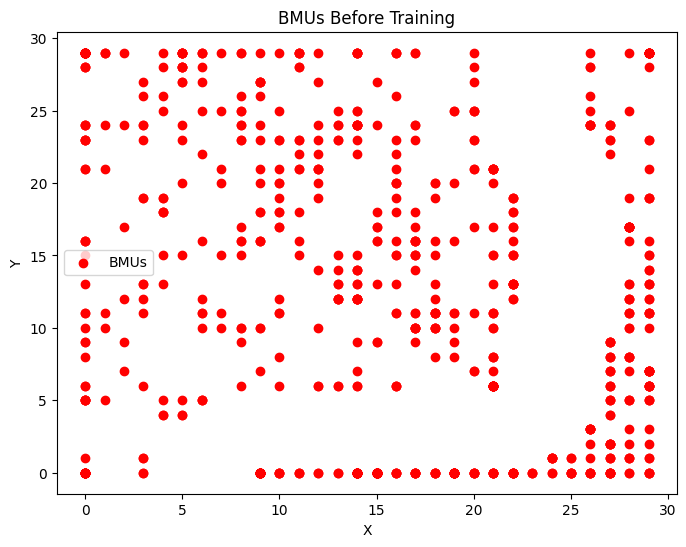

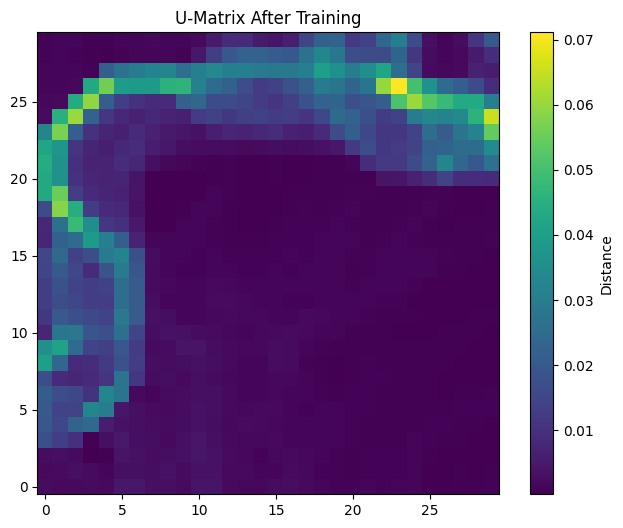

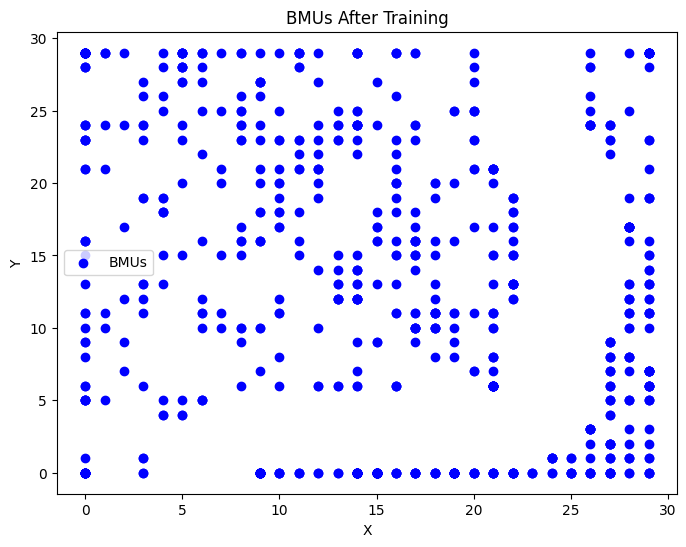

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute U-matrix
def compute_u_matrix(som):
    u_matrix = np.zeros((som.grid_size[0], som.grid_size[1]))
    for i in range(som.grid_size[0]):
        for j in range(som.grid_size[1]):
            neighbors = []
            if i > 0:
                neighbors.append((i - 1, j))
            if i < som.grid_size[0] - 1:
                neighbors.append((i + 1, j))
            if j > 0:
                neighbors.append((i, j - 1))
            if j < som.grid_size[1] - 1:
                neighbors.append((i, j + 1))
            neighbor_distances = []
            for ni, nj in neighbors:
                neighbor_distances.append(np.linalg.norm(som.weights[i, j] - som.weights[ni, nj]))
            u_matrix[i, j] = np.mean(neighbor_distances)
    return u_matrix

# Function to find BMUs for data points
def find_bmus(som, data):
    bmus = []
    for sample in data:
        bmu = som.find_bmu(sample)
        bmus.append(bmu)
    return bmus

# Compute U-matrix before training
u_matrix_before_training = compute_u_matrix(som)

# Find BMUs before training
bmus_before_training = find_bmus(som, data)

# Train the SOM (if not already trained)
# som.train(data, epochs, initial_learning_rate, initial_radius)

# Compute U-matrix after training
u_matrix_after_training = compute_u_matrix(som)

# Find BMUs after training
bmus_after_training = find_bmus(som, data)

# Plot U-matrix before training
plt.figure(figsize=(8, 6))
plt.imshow(u_matrix_before_training, cmap='viridis', origin='lower')
plt.title('U-Matrix Before Training')
plt.colorbar(label='Distance')
plt.show()

# Plot BMUs before training
plt.figure(figsize=(8, 6))
bmus_before_training = np.array(bmus_before_training)
plt.scatter(bmus_before_training[:, 0], bmus_before_training[:, 1], color='red', label='BMUs')
plt.title('BMUs Before Training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Plot U-matrix after training
plt.figure(figsize=(8, 6))
plt.imshow(u_matrix_after_training, cmap='viridis', origin='lower')
plt.title('U-Matrix After Training')
plt.colorbar(label='Distance')
plt.show()

# Plot BMUs after training
plt.figure(figsize=(8, 6))
bmus_after_training = np.array(bmus_after_training)
plt.scatter(bmus_after_training[:, 0], bmus_after_training[:, 1], color='blue', label='BMUs')
plt.title('BMUs After Training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


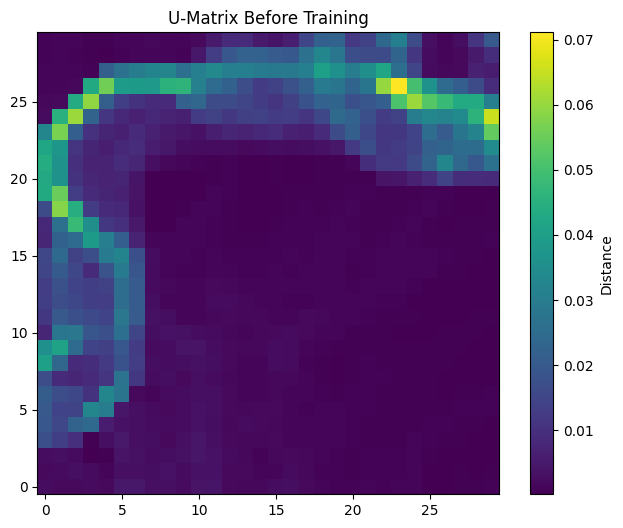

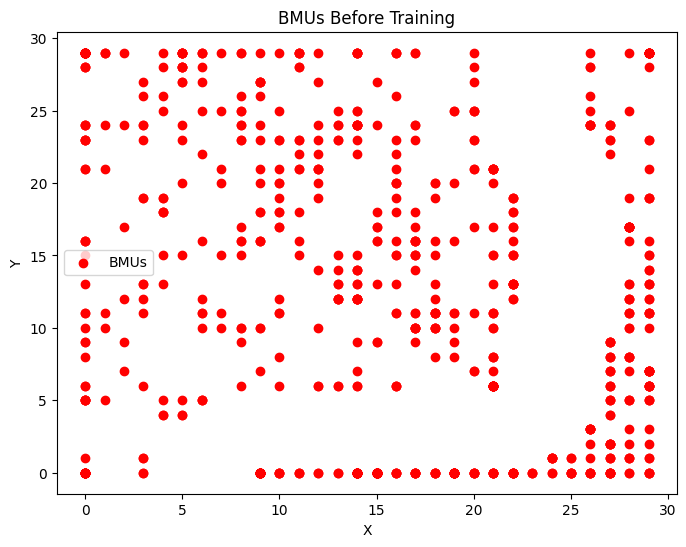

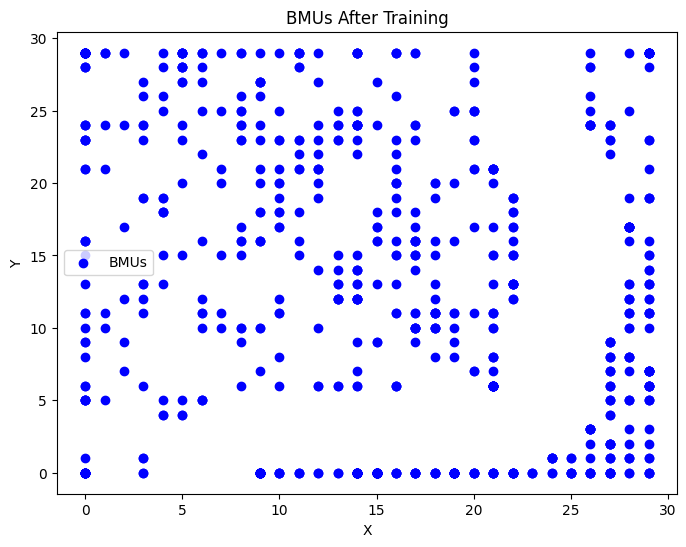

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute U-matrix
def compute_u_matrix(som):
    u_matrix = np.zeros((som.grid_size[0], som.grid_size[1]))
    for i in range(som.grid_size[0]):
        for j in range(som.grid_size[1]):
            neighbors = []
            if i > 0:
                neighbors.append((i - 1, j))
            if i < som.grid_size[0] - 1:
                neighbors.append((i + 1, j))
            if j > 0:
                neighbors.append((i, j - 1))
            if j < som.grid_size[1] - 1:
                neighbors.append((i, j + 1))
            neighbor_distances = []
            for ni, nj in neighbors:
                neighbor_distances.append(np.linalg.norm(som.weights[i, j] - som.weights[ni, nj]))
            u_matrix[i, j] = np.mean(neighbor_distances)
    return u_matrix

# Function to find BMUs for data points
def find_bmus(som, data):
    bmus = []
    for sample in data:
        bmu = som.find_bmu(sample)
        bmus.append(bmu)
    return bmus

# Example usage:
# Compute U-matrix
u_matrix = compute_u_matrix(som)

# Find BMUs before training
bmus_before_training = find_bmus(som, data)

# Train the SOM (if not already trained)
# som.train(data, epochs, initial_learning_rate, initial_radius)

# Find BMUs after training
bmus_after_training = find_bmus(som, data)

# Plot U-matrix before training
plt.figure(figsize=(8, 6))
plt.imshow(u_matrix, cmap='viridis', origin='lower')
plt.title('U-Matrix Before Training')
plt.colorbar(label='Distance')
plt.show()

# Plot BMUs before training
plt.figure(figsize=(8, 6))
bmus_before_training = np.array(bmus_before_training)
plt.scatter(bmus_before_training[:, 0], bmus_before_training[:, 1], color='red', label='BMUs')
plt.title('BMUs Before Training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Plot BMUs after training
plt.figure(figsize=(8, 6))
bmus_after_training = np.array(bmus_after_training)
plt.scatter(bmus_after_training[:, 0], bmus_after_training[:, 1], color='blue', label='BMUs')
plt.title('BMUs After Training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


Epoch 1/1 completed.
Epoch 1/100 completed.
Epoch 1/1 completed.
Epoch 2/100 completed.
Epoch 1/1 completed.
Epoch 3/100 completed.
Epoch 1/1 completed.
Epoch 4/100 completed.
Epoch 1/1 completed.
Epoch 5/100 completed.
Epoch 1/1 completed.
Epoch 6/100 completed.
Epoch 1/1 completed.
Epoch 7/100 completed.
Epoch 1/1 completed.
Epoch 8/100 completed.
Epoch 1/1 completed.
Epoch 9/100 completed.
Epoch 1/1 completed.
Epoch 10/100 completed.
Epoch 1/1 completed.
Epoch 11/100 completed.
Epoch 1/1 completed.
Epoch 12/100 completed.
Epoch 1/1 completed.
Epoch 13/100 completed.
Epoch 1/1 completed.
Epoch 14/100 completed.
Epoch 1/1 completed.
Epoch 15/100 completed.
Epoch 1/1 completed.
Epoch 16/100 completed.
Epoch 1/1 completed.
Epoch 17/100 completed.
Epoch 1/1 completed.
Epoch 18/100 completed.
Epoch 1/1 completed.
Epoch 19/100 completed.
Epoch 1/1 completed.
Epoch 20/100 completed.
Epoch 1/1 completed.
Epoch 21/100 completed.
Epoch 1/1 completed.
Epoch 22/100 completed.
Epoch 1/1 completed

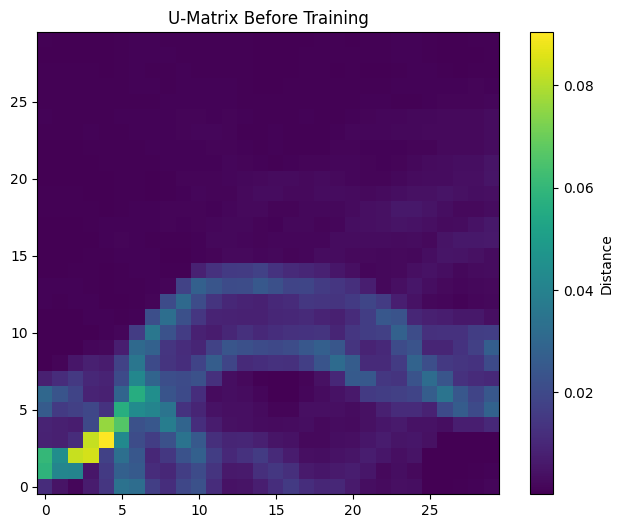

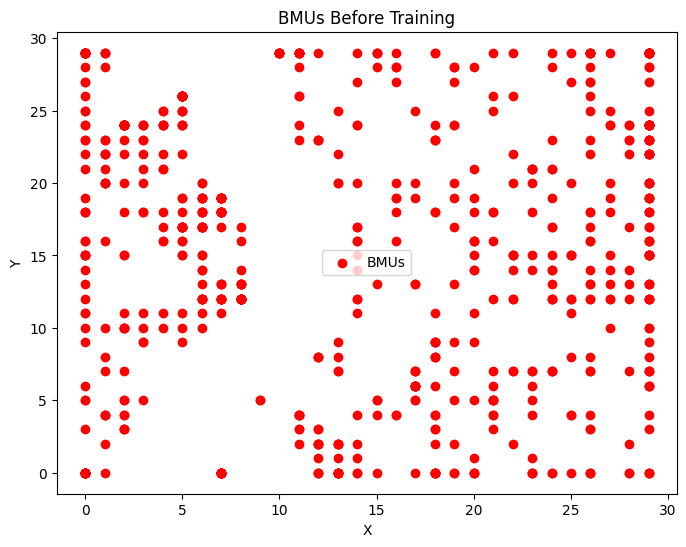

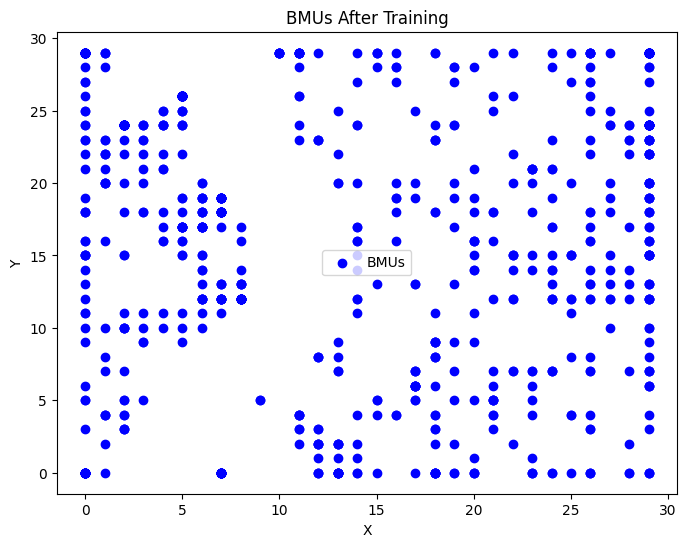

In [ ]:
# Initialize SOM with chosen hyperparameters
input_size = 5  # Dimension of input vectors
grid_size = (30, 30)  # Size of SOM grid
som = SOM(input_size, grid_size)

# Define training parameters with decreasing learning rate and radius
epochs = 100  # Number of training epochs
initial_learning_rate = 0.1  # Initial learning rate
initial_radius = max(grid_size) / 2  # Initial radius for neighborhood function

# Train the SOM with decreasing learning rate and radius
for epoch in range(epochs):
    learning_rate = initial_learning_rate * np.exp(-epoch / epochs)
    radius = initial_radius * np.exp(-epoch / epochs)
    som.train(data, 1, learning_rate, radius)
    print(f"Epoch {epoch+1}/{epochs} completed.")

# Plot U-matrix and BMUs as before
# Compute U-matrix
u_matrix = compute_u_matrix(som)

# Find BMUs before training
bmus_before_training = find_bmus(som, data)

# Find BMUs after training
bmus_after_training = find_bmus(som, data)

# Plot U-matrix before training
plt.figure(figsize=(8, 6))
plt.imshow(u_matrix, cmap='viridis', origin='lower')
plt.title('U-Matrix Before Training')
plt.colorbar(label='Distance')
plt.show()

# Plot BMUs before training
plt.figure(figsize=(8, 6))
bmus_before_training = np.array(bmus_before_training)
plt.scatter(bmus_before_training[:, 0], bmus_before_training[:, 1], color='red', label='BMUs')
plt.title('BMUs Before Training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Plot BMUs after training
plt.figure(figsize=(8, 6))
bmus_after_training = np.array(bmus_after_training)
plt.scatter(bmus_after_training[:, 0], bmus_after_training[:, 1], color='blue', label='BMUs')
plt.title('BMUs After Training')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


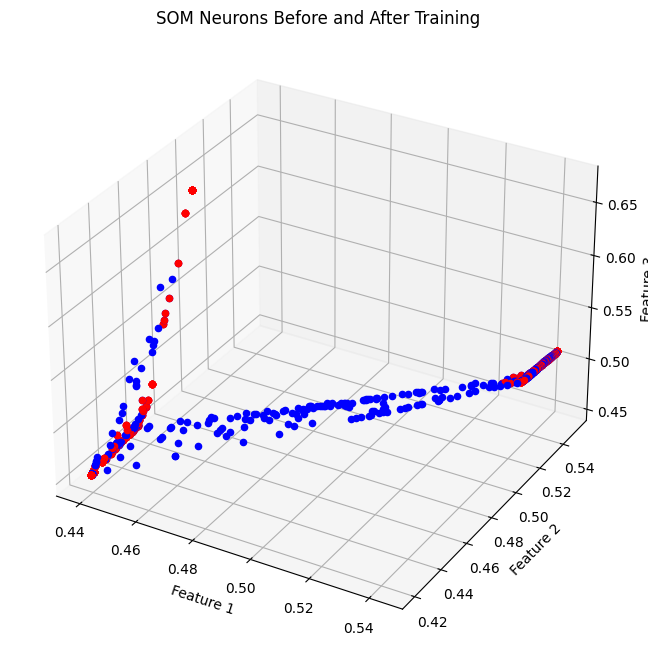

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to plot SOM neurons in 3D
def plot_som_neurons_3d(som, data, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title)

    # Plot SOM neurons before training
    for i in range(som.grid_size[0]):
        for j in range(som.grid_size[1]):
            ax.scatter(som.weights[i, j, 0], som.weights[i, j, 1], som.weights[i, j, 2], color='blue')

    # Plot SOM neurons after training
    for sample in data:
        bmu = som.find_bmu(sample)
        ax.scatter(som.weights[bmu[0], bmu[1], 0], som.weights[bmu[0], bmu[1], 1], som.weights[bmu[0], bmu[1], 2], color='red')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

    plt.show()

# Example usage:
# Plot SOM neurons in 3D before and after training
plot_som_neurons_3d(som, data, 'SOM Neurons Before and After Training')
